
## <span style="color:blue">CREATING COVID-19 IMAGE MODEL USING TENSORFLOW</span>

In [61]:
#Importing necessary libraries
import random
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
import pandas as pd
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
df=pd.read_csv("metadata.csv")

In [3]:
#Creating data for positive samples
file_path = "metadata.csv"
images_path = "dataset/Normal"

In [4]:
df = pd.read_csv(file_path)
print(df.shape)

(372, 29)


In [5]:
df.head()


,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [16]:
#sampling images from kaggle
kaggle_file_path = "chest_xray/chest_xray/train/NORMAL"
target_normal_dir = "dataset/Normal"

In [17]:
image_names = os.listdir(kaggle_file_path)
image_names

['.DS_Store',
 'IM-0115-0001.jpeg',
 'IM-0117-0001.jpeg',
 'IM-0119-0001.jpeg',
 'IM-0122-0001.jpeg',
 'IM-0125-0001.jpeg',
 'IM-0127-0001.jpeg',
 'IM-0128-0001.jpeg',
 'IM-0129-0001.jpeg',
 'IM-0131-0001.jpeg',
 'IM-0133-0001.jpeg',
 'IM-0135-0001.jpeg',
 'IM-0137-0001.jpeg',
 'IM-0140-0001.jpeg',
 'IM-0141-0001.jpeg',
 'IM-0143-0001.jpeg',
 'IM-0145-0001.jpeg',
 'IM-0147-0001.jpeg',
 'IM-0149-0001.jpeg',
 'IM-0151-0001.jpeg',
 'IM-0152-0001.jpeg',
 'IM-0154-0001.jpeg',
 'IM-0156-0001.jpeg',
 'IM-0158-0001.jpeg',
 'IM-0160-0001.jpeg',
 'IM-0162-0001.jpeg',
 'IM-0164-0001.jpeg',
 'IM-0166-0001.jpeg',
 'IM-0168-0001.jpeg',
 'IM-0170-0001.jpeg',
 'IM-0172-0001.jpeg',
 'IM-0176-0001.jpeg',
 'IM-0177-0001.jpeg',
 'IM-0178-0001.jpeg',
 'IM-0180-0001.jpeg',
 'IM-0182-0001.jpeg',
 'IM-0183-0001.jpeg',
 'IM-0185-0001.jpeg',
 'IM-0187-0001.jpeg',
 'IM-0189-0001.jpeg',
 'IM-0191-0001.jpeg',
 'IM-0193-0001.jpeg',
 'IM-0195-0001.jpeg',
 'IM-0199-0001.jpeg',
 'IM-0201-0001.jpeg',
 'IM-0203-0001.jpe

In [18]:
random.shuffle(image_names)

In [19]:
for i in range (142):
    image_name = image_names[i]
    image_path = os.path.join(kaggle_file_path, image_name)
    target_path = os.path.join(target_normal_dir, image_name)
    shutil.copy2(image_path, target_path)
    print("copying image ",i)

copying image  0
copying image  1
copying image  2
copying image  3
copying image  4
copying image  5
copying image  6
copying image  7
copying image  8
copying image  9
copying image  10
copying image  11
copying image  12
copying image  13
copying image  14
copying image  15
copying image  16
copying image  17
copying image  18
copying image  19
copying image  20
copying image  21
copying image  22
copying image  23
copying image  24
copying image  25
copying image  26
copying image  27
copying image  28
copying image  29
copying image  30
copying image  31
copying image  32
copying image  33
copying image  34
copying image  35
copying image  36
copying image  37
copying image  38
copying image  39
copying image  40
copying image  41
copying image  42
copying image  43
copying image  44
copying image  45
copying image  46
copying image  47
copying image  48
copying image  49
copying image  50
copying image  51
copying image  52
copying image  53
copying image  54
copying image  55
co

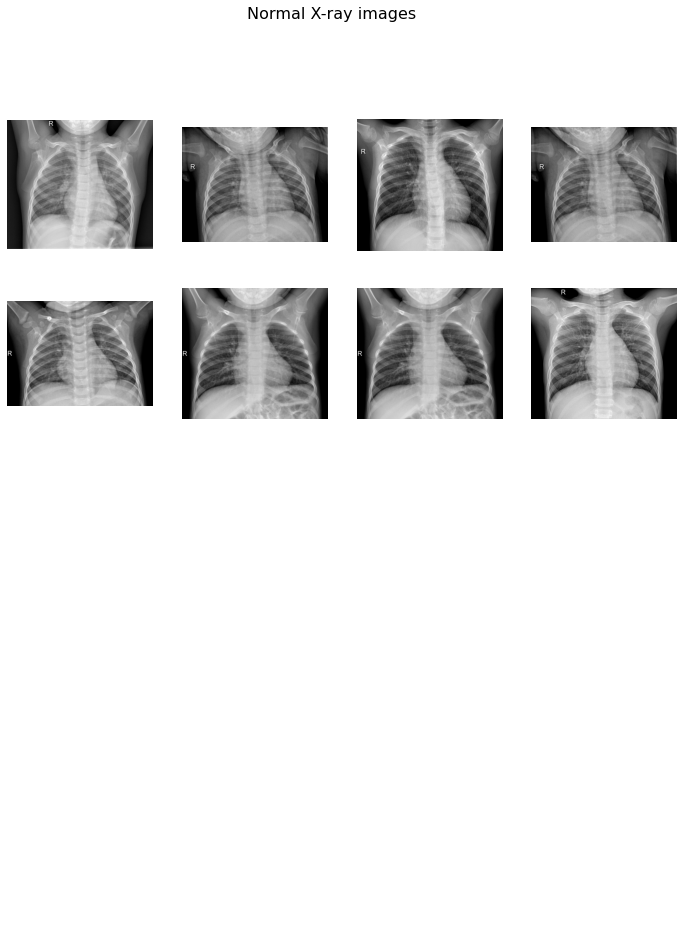

In [39]:
import matplotlib.pyplot as plt

def plot_images(image_list, rows, cols, maintitle=""):
    fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
    fig.suptitle(maintitle, fontsize=16)

    for i, ax in enumerate(axes.flat):
        if i < len(image_list):
            img = plt.imread(image_list[i])
            ax.imshow(img, cmap='gray')
            ax.axis('off')
        else:
            ax.axis('off')

    plt.show()

# Assuming normal_images is a list containing file paths of the normal X-ray images
normal_images = [
    "dataset/Normal/IM-0115-0001.jpeg",
    "dataset/Normal/IM-0131-0001.jpeg",
    "dataset/Normal/IM-0289-0001.jpeg",
    "dataset/Normal/IM-0131-0001.jpeg",
    "dataset/Normal/IM-0145-0001.jpeg",
    "dataset/Normal/IM-0565-0001.jpeg",
    "dataset/Normal/IM-0565-0001.jpeg",
    "dataset/Normal/IM-0143-0001.jpeg",  
    
]  


rows = 5
cols = 4

maintitle = "Normal X-ray images"
plot_images(normal_images, rows, cols, maintitle)


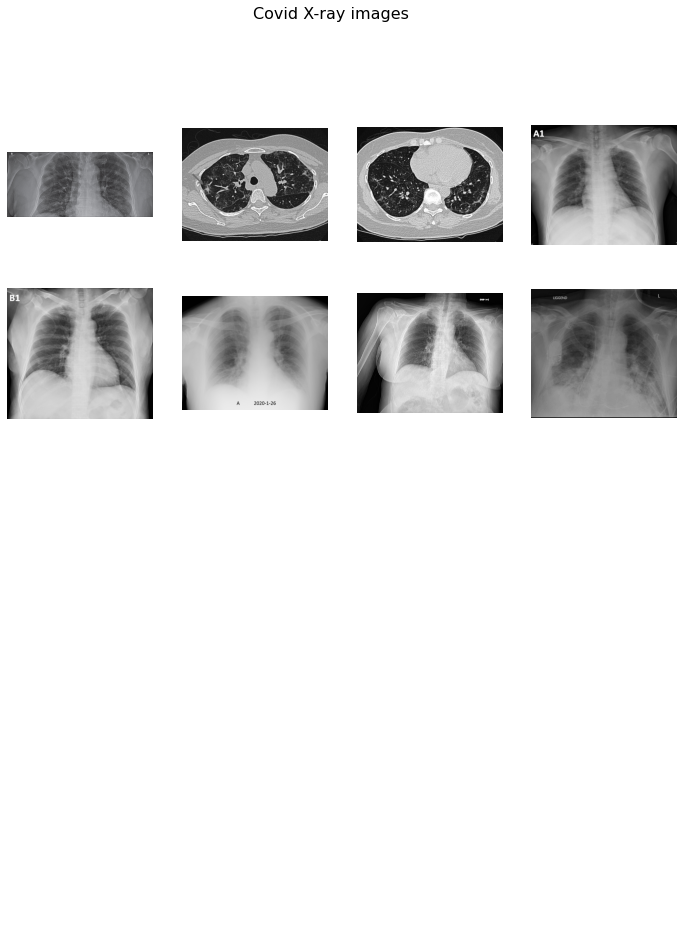

In [41]:
covid_images = [
    "dataset/Covid/1-s2.0-S0140673620303706-fx1_lrg.jpg",
    "dataset/Covid/1-s2.0-S0929664620300449-gr3_lrg-a.jpg",
    "dataset/Covid/1-s2.0-S0929664620300449-gr3_lrg-d.jpg",
    "dataset/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png",
    "dataset/Covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png",
    "dataset/Covid/4ad30bc6-2da0-4f84-bc9b-62acabfd518a.annot.original.png",
    "dataset/Covid/5CBC2E94-D358-401E-8928-965CCD965C5C.jpeg",
    "dataset/Covid/67d668e570c242404ba82c7cbe2ca8f2-05be-0.jpg",
    
]
maintitle = "Covid X-ray images"
plot_images(covid_images, rows, cols, maintitle)

## <span style="color:black">Building CNN Model on KERAS</span>

In [42]:
train_path = "chest_xray/train"
test_path = "chest_xray/test"


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [51]:
train_generator = train_datagen.flow_from_directory(
    'chest_xray/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')
    

Found 5217 images belonging to 2 classes.


In [47]:
train_generator.class_indices

{'.ipynb_checkpoints': 0}

In [52]:
hist = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=10
)


Epoch 1/10
8/8 [==============================] - 96s 13s/step - loss: 1.3337 - accuracy: 0.6328 - val_loss: 0.6597 - val_accuracy: 0.7625
Epoch 2/10
8/8 [==============================] - 124s 16s/step - loss: 0.6003 - accuracy: 0.7344 - val_loss: 0.6724 - val_accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 123s 15s/step - loss: 0.6305 - accuracy: 0.6875 - val_loss: 0.6586 - val_accuracy: 0.7469
Epoch 4/10
8/8 [==============================] - 97s 12s/step - loss: 0.5702 - accuracy: 0.7617 - val_loss: 0.6765 - val_accuracy: 0.7406
Epoch 5/10
8/8 [==============================] - 103s 13s/step - loss: 0.6097 - accuracy: 0.7266 - val_loss: 0.6005 - val_accuracy: 0.7250
Epoch 6/10
8/8 [==============================] - 102s 13s/step - loss: 0.5735 - accuracy: 0.7461 - val_loss: 0.6428 - val_accuracy: 0.7250
Epoch 7/10
8/8 [==============================] - 96s 12s/step - loss: 0.5310 - accuracy: 0.7578 - val_loss: 0.6016 - val_accuracy: 0.7375
Epoch 8/10
8/8 [=======

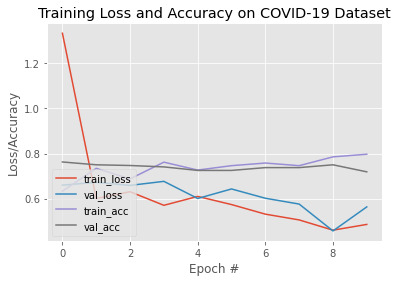

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined and compiled your model as 'model'

# Training your model and obtaining the training history


# Now you can create the plot using the obtained training history
N = len(hist.history["loss"])
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")


## <span style="color:black">Conclusion</span>

### Radologists can predict whether a person has Covid-19 or not using the model. X-Ray images of individuals have been trained by the model and obtained an accuracy of 79%. Since the model is not 100% accurate, further tests should be conducted for proper diagnosis.